Date            0
Open            0
High            0
Low             0
Close           0
Date_numeric    0
dtype: int64


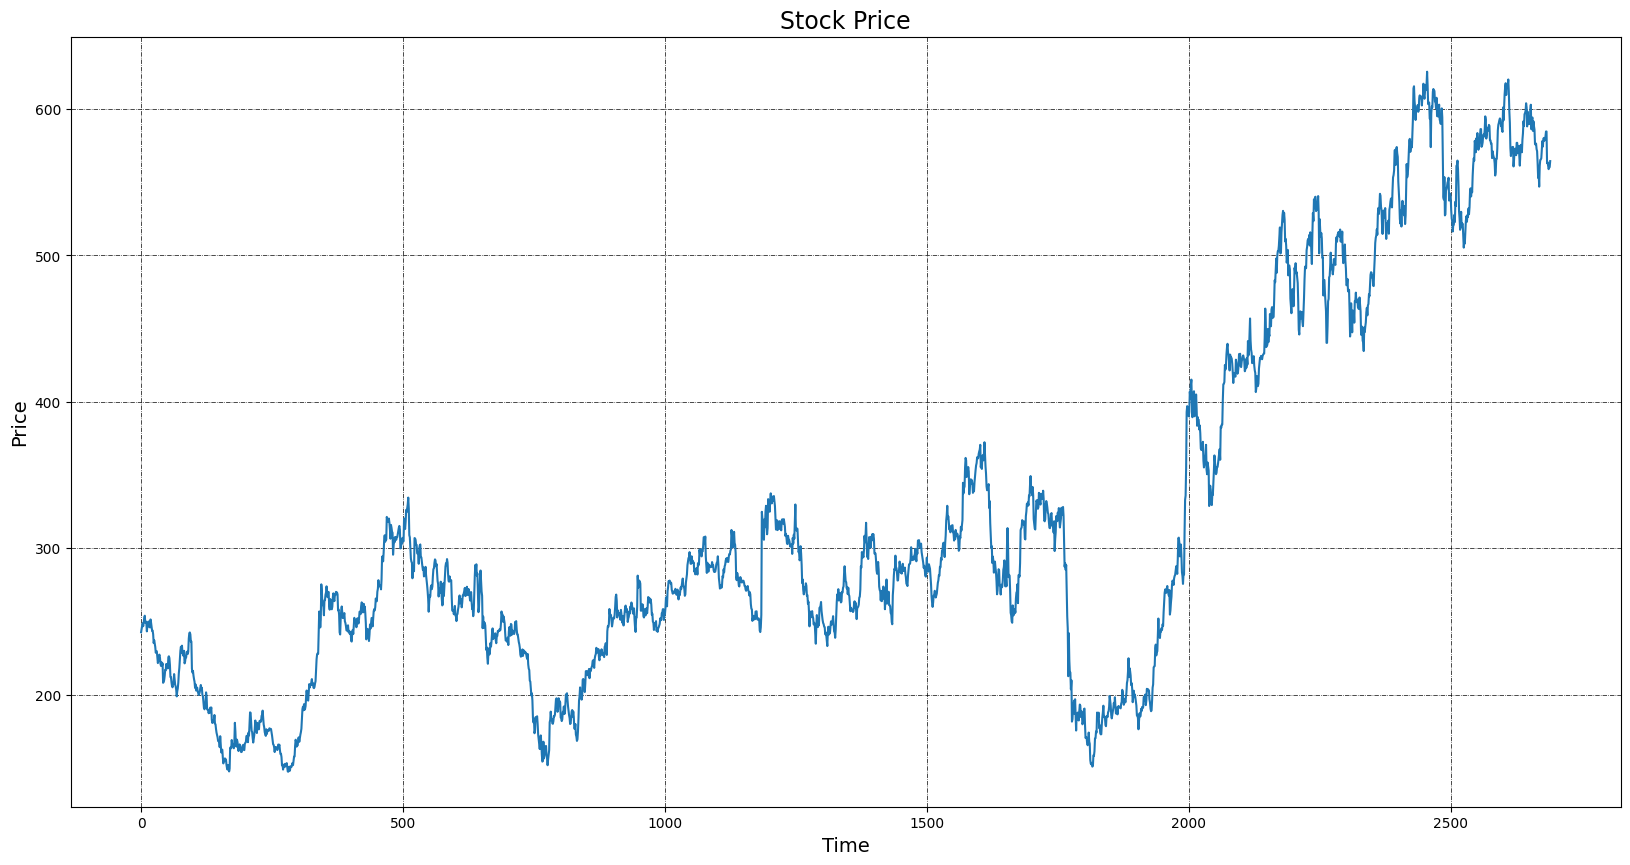

R^2 score of KNN: 0.9975694479987531
R^2 score of RF: 0.998039388051016
R^2 score of LR: 0.6196308675566065
Random Forest Model Selected:
            Date       Close  Predicted Close (Random Forest)
0     01/01/2013  242.645004                       243.945417
1     01/02/2013  245.054993                       244.813013
2     01/03/2013  247.160004                       247.462236
3     01/04/2013  248.669998                       247.462236
4     01/07/2013  246.759995                       249.516259
...          ...         ...                              ...
2686  11/21/2023  561.500000                       562.979269
2687  11/22/2023  558.950012                       560.440149
2688  11/23/2023  559.950012                       560.254883
2689  11/24/2023  560.349976                       560.254883
2690  11/28/2023  564.450012                       560.254883

[2691 rows x 3 columns]


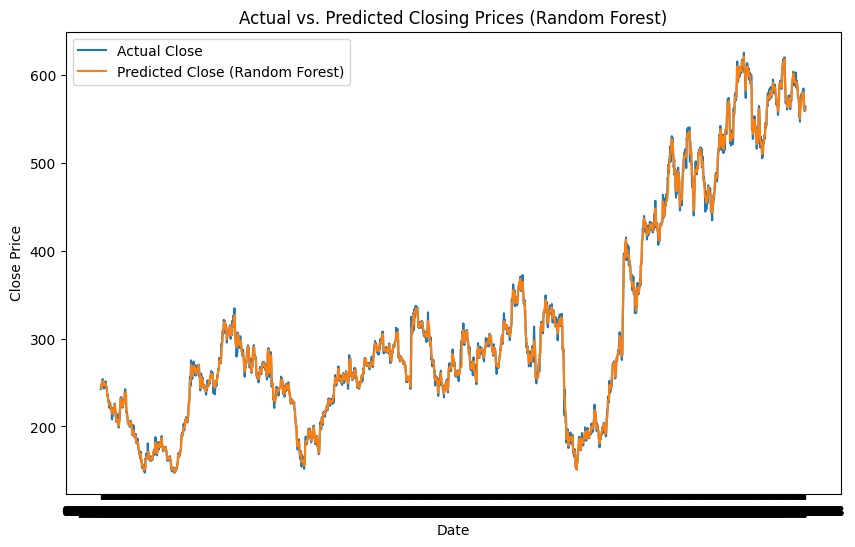

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Reading the dataset
df = pd.read_csv("sbi.csv")
df = df.rename(columns={'Close(t)': 'Close'})

# Checking for null values
print(df.isnull().sum())
# Handling missing values
df.dropna(subset=['Close'], inplace=True)

#plotting the close price graph
df['Close'].plot(figsize=(20, 10))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


# Building the train, test sets
df['Date_numeric'] = pd.to_datetime(df['Date']).dt.date.astype(str).str.replace('-', '').astype(int)
X = df[['Date_numeric']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
def knn():
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    r2_knn = r2_score(y_test, y_pred_knn)
    return r2_knn

# RF
def rf():
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    r2_rf = r2_score(y_test, y_pred_rf)
    return r2_rf

# LR
def lr():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_lr = r2_score(y_test, y_pred)
    return r2_lr

print("R^2 score of KNN:", knn())
print("R^2 score of RF:", rf())
print("R^2 score of LR:", lr())

# KNN predictions
def knnpred():
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(df[['Date_numeric']])
    result_df_knn = df.copy()
    result_df_knn['Predicted Close (KNN)'] = y_pred_knn
    print(result_df_knn[['Date', 'Close', 'Predicted Close (KNN)']])
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], label='Actual Close')
    plt.plot(df['Date'], y_pred_knn, label='Predicted Close (KNN)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Closing Prices (KNN)')
    plt.legend()
    plt.show()

# RF predictions
def rfpred():
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(df[['Date_numeric']])
    result_df_rf = df.copy()
    result_df_rf['Predicted Close (Random Forest)'] = y_pred_rf
    print(result_df_rf[['Date', 'Close', 'Predicted Close (Random Forest)']])
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], label='Actual Close')
    plt.plot(df['Date'], y_pred_rf, label='Predicted Close (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Closing Prices (Random Forest)')
    plt.legend()
    plt.show()

# LR predictions
def lrpred():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(df[['Date_numeric']])
    result_df_linear_regression = df.copy()
    result_df_linear_regression['Predicted Close (Linear Regression)'] = y_pred
    print(result_df_linear_regression[['Date', 'Close', 'Predicted Close (Linear Regression)']])
    plt.figure(figsize=(15, 8))
    plt.plot(df['Date'], df['Close'], label='Actual Close')
    plt.plot(df['Date'], y_pred, label='Predicted Close (Linear Regression)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Closing Prices (Linear Regression)')
    plt.legend()
    plt.show()

# Selecting the model with the highest R^2 score
z = max(knn(), rf(), lr())
if z == knn():
    print("KNN Model Selected:")
    knnpred()
elif z == rf():
    print("Random Forest Model Selected:")
    rfpred()
elif z == lr():
    print("Linear Regression Model Selected:")
    lrpred()

Date            0
Open            0
High            0
Low             0
Close           0
Date_numeric    0
dtype: int64


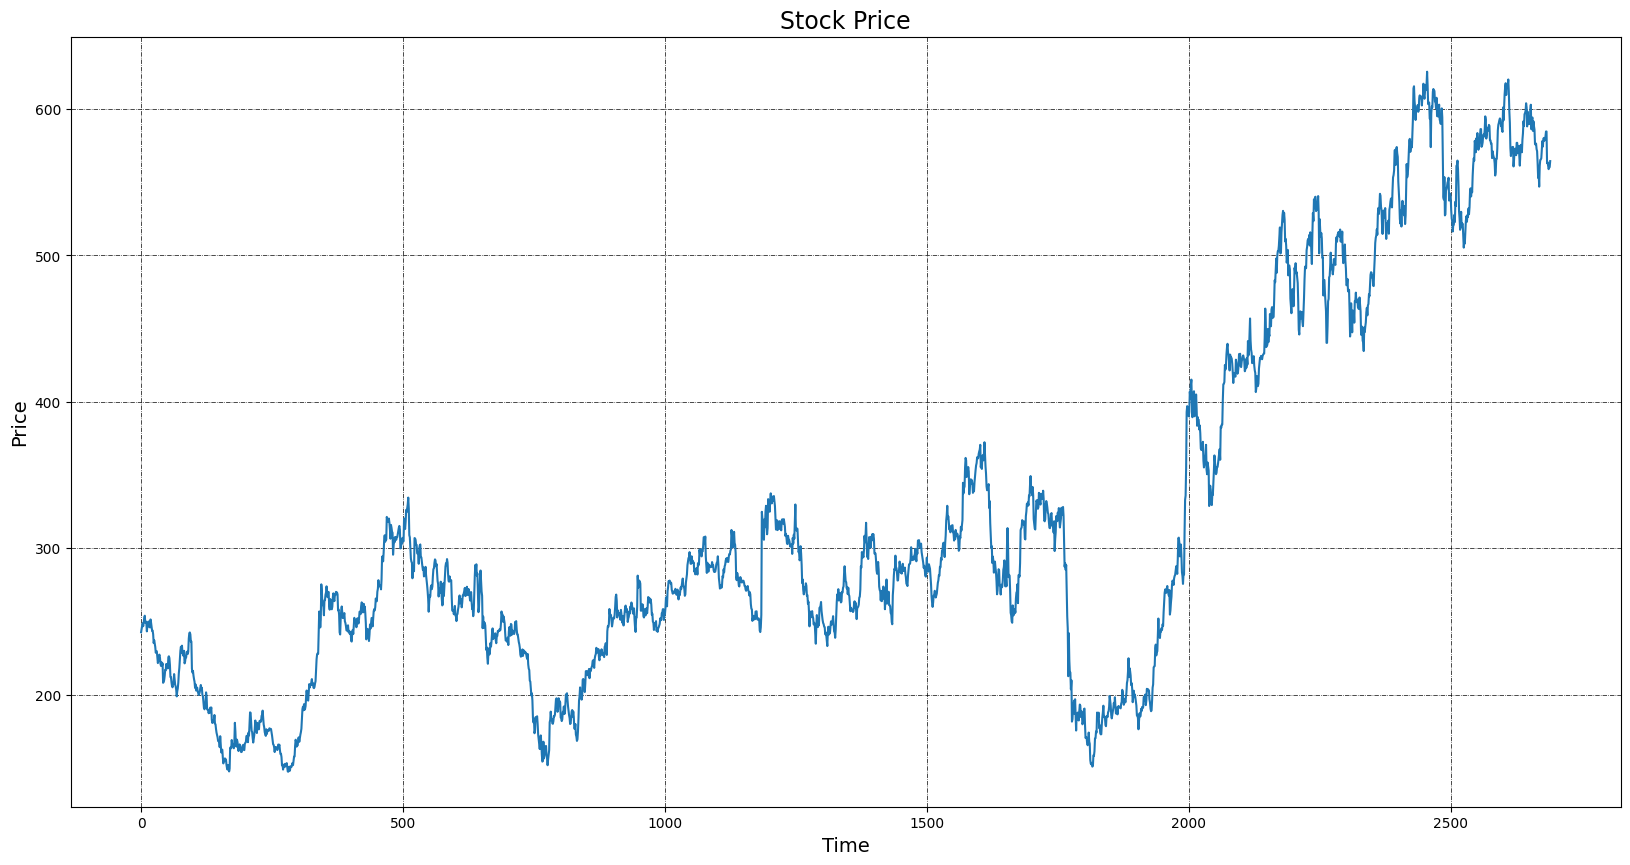

R^2 score of KNN: 0.9975694479987531
R^2 score of RF: 0.9964840968406267
R^2 score of LR: 0.6196308675565944
KNN Model Selected:
            Date       Close  Predicted Close (KNN)
1550  04/18/2019  310.799988             312.379999
2218  12/30/2021  451.700012             458.620001
368   06/26/2014  265.255005             263.539001
535   03/05/2015  293.799988             291.970001
1659  09/30/2019  270.799988             290.190002
...          ...         ...                    ...
2623  08/18/2023  572.950012             568.650000
1463  12/10/2018  274.200012             284.020001
353   06/05/2014  269.790009             266.923999
208   11/01/2013  187.899994             173.467999
610   06/25/2015  264.799988             263.700000

[539 rows x 3 columns]


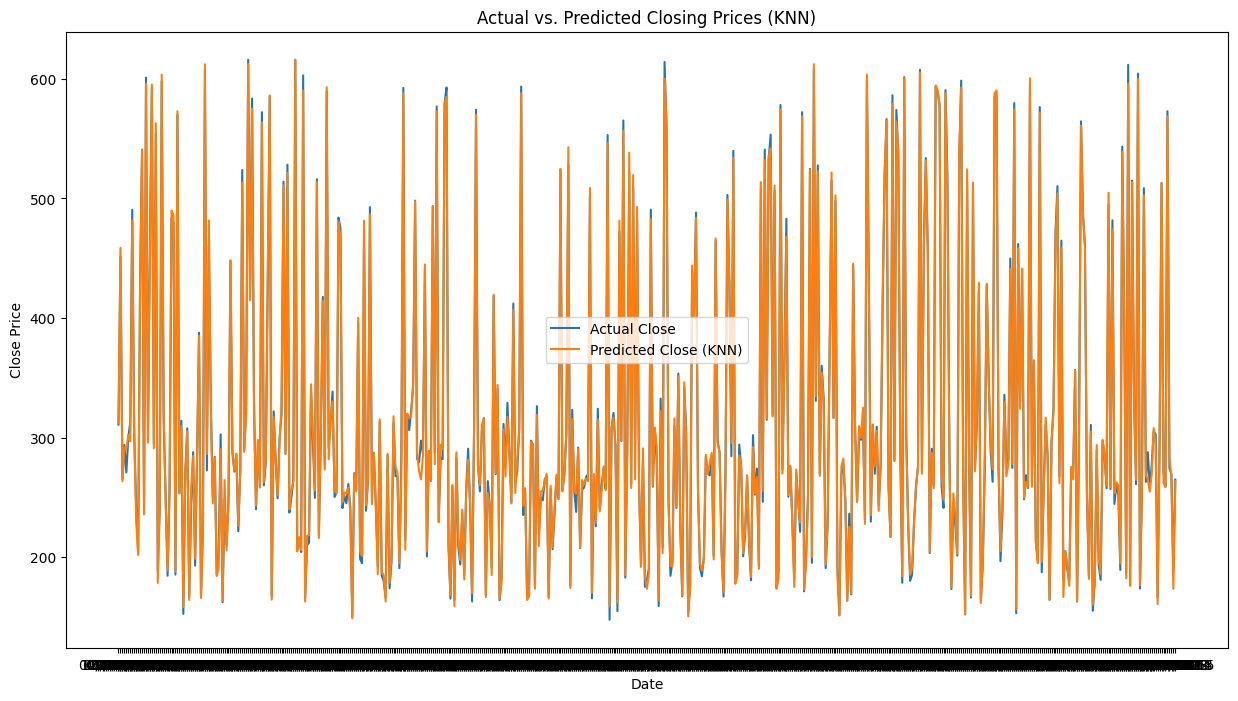

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reading the dataset
df = pd.read_csv("sbi.csv")
df = df.rename(columns={'Close(t)': 'Close'})

# Checking for null values
print(df.isnull().sum())
# Handling missing values
df['Close'].fillna(method='ffill', inplace=True)  # Forward fill

#plotting the close price graph
df['Close'].plot(figsize=(20, 10))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


# Building the train, test sets
df['Date_numeric'] = pd.to_datetime(df['Date']).dt.date.astype(str).str.replace('-', '').astype(int)
X = df[['Date_numeric']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def knn():
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    r2_knn = r2_score(y_test, y_pred_knn)
    return r2_knn


# RF
# Updated RF with hyperparameter tuning
def rf():
    model_rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    r2_rf = r2_score(y_test, y_pred_rf)
    return r2_rf


# LR
def lr():
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for more or less regularization
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_lr = r2_score(y_test, y_pred)
    return r2_lr


print("R^2 score of KNN:", knn())
print("R^2 score of RF:", rf())
print("R^2 score of LR:", lr())

# KNN predictions on testing set
def knnpred():
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    result_df_knn = df.loc[X_test.index].copy()  # Use the index of the testing set
    result_df_knn['Predicted Close (KNN)'] = y_pred_knn
    print(result_df_knn[['Date', 'Close', 'Predicted Close (KNN)']])
    plt.figure(figsize=(15, 8))
    plt.plot(result_df_knn['Date'], result_df_knn['Close'], label='Actual Close')
    plt.plot(result_df_knn['Date'], y_pred_knn, label='Predicted Close (KNN)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Closing Prices (KNN)')
    plt.legend()
    plt.show()

# RF predictions on testing set
def rfpred():
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    result_df_rf = df.loc[X_test.index].copy()  # Use the index of the testing set
    result_df_rf['Predicted Close (Random Forest)'] = y_pred_rf
    print(result_df_rf[['Date', 'Close', 'Predicted Close (Random Forest)']])
    plt.figure(figsize=(10, 6))
    plt.plot(result_df_rf['Date'], result_df_rf['Close'], label='Actual Close')
    plt.plot(result_df_rf['Date'], y_pred_rf, label='Predicted Close (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Closing Prices (Random Forest)')
    plt.legend()
    plt.show()

# LR predictions on testing set
def lrpred():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result_df_linear_regression = df.loc[X_test.index].copy()  # Use the index of the testing set
    result_df_linear_regression['Predicted Close (Linear Regression)'] = y_pred
    print(result_df_linear_regression[['Date', 'Close', 'Predicted Close (Linear Regression)']])
    plt.figure(figsize=(15, 8))
    plt.plot(result_df_linear_regression['Date'], result_df_linear_regression['Close'], label='Actual Close')
    plt.plot(result_df_linear_regression['Date'], y_pred, label='Predicted Close (Linear Regression)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Closing Prices (Linear Regression)')
    plt.legend()
    plt.show()


# Selecting the model with the highest R^2 score
z = max(knn(), rf(), lr())
if z == knn():
    print("KNN Model Selected:")
    knnpred()
elif z == rf():
    print("Random Forest Model Selected:")
    rfpred()
elif z == lr():
    print("Linear Regression Model Selected:")
    lrpred()